In [1]:
import pandas as pd

df = pd.read_csv('Airline_review.csv')


In [3]:
df['Review']

0          Moroni to Moheli. Turned out to be a pretty ...
1         Moroni to Anjouan. It is a very small airline...
2          Anjouan to Dzaoudzi. A very small airline an...
3          Please do a favor yourself and do not fly wi...
4         Do not book a flight with this airline! My fr...
                               ...                        
23166     Bangkok to Tokyo. I’ve flown many low cost ai...
23167      Avoid at all costs. I booked flights to go f...
23168      Flight was leaving at 23.15 and after an hou...
23169     Zipair is JAL’s budget airline. They don’t ha...
23170      They lied about connection in Narita and we ...
Name: Review, Length: 23171, dtype: object

In [5]:
df['Review'].describe()

count                                                 23171
unique                                                23046
top       I spend at least the half of my time during a ...
freq                                                      2
Name: Review, dtype: object

In [7]:
import re
import html

def clean_text(text):
    if not isinstance(text, str):
        return ''

    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'\(.*?\)', '', text)
    text = re.sub(r'\{.*?\}', '', text)
    text = re.sub(r'[!"\'#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF]', '', text)
    text = ''.join(char for char in text if ord(char) < 128)
    text = re.sub(r'[^a-zA-Z0-9\s@#]', '', text)
    text = re.sub(r'[\t\u00A0]', ' ', text)
    text = re.sub(r'@[^\s]+', '', text)
    text = re.sub(r'#[^\s]+', '', text)
    text = html.unescape(text)
    text = text.lower()

    return text

df['clean_text'] = df['Review'].apply(clean_text)


In [9]:
df[['clean_text', 'Review']].head(1)

,clean_text,Review
0,moroni to moheli turned out to be a pretty d...,Moroni to Moheli. Turned out to be a pretty ...


In [11]:
import nltk
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize

df['tokens'] = df['clean_text'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/joannasmietanowska/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [13]:
df[['clean_text', 'tokens']].head(1)

,clean_text,tokens
0,moroni to moheli turned out to be a pretty d...,"[moroni, to, moheli, turned, out, to, be, a, p..."


In [43]:
from collections import Counter
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

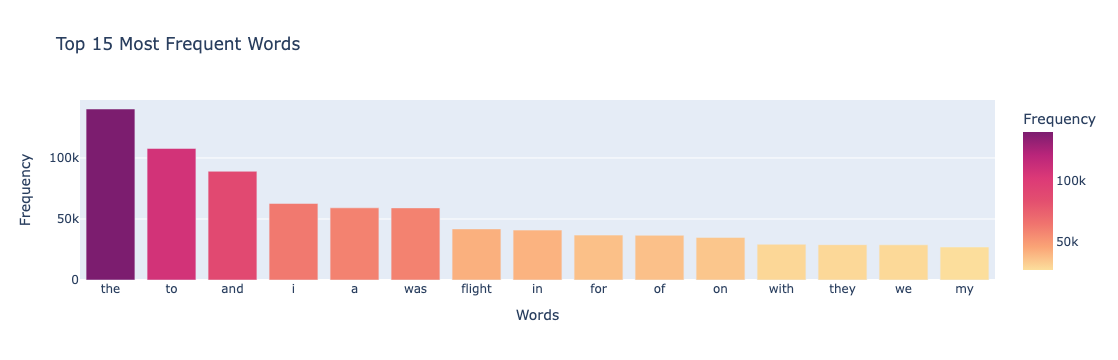

In [111]:
all_tokens = [token for sublist in df['tokens'] for token in sublist]

word_counts = Counter(all_tokens)

top_words = word_counts.most_common(15)

top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

fig = px.bar(top_words_df, x='Word', y='Frequency', title='Top 15 Most Frequent Words',
             labels={'Word': 'Words', 'Frequency': 'Frequency'},
             color='Frequency', color_continuous_scale='sunsetdark')

fig.show()


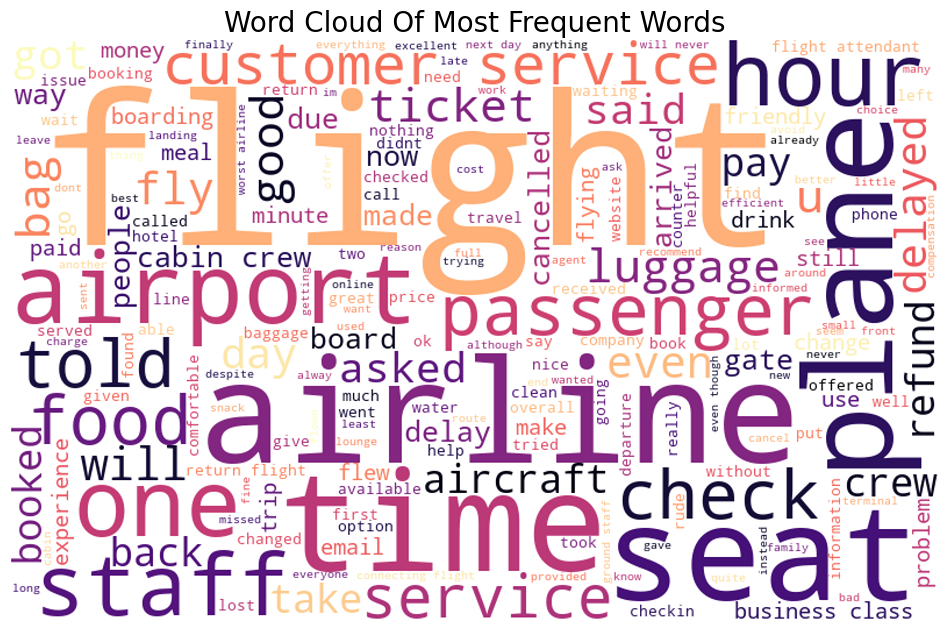

In [123]:
all_tokens = [token for sublist in df['tokens'] for token in sublist]
text = " ".join(all_tokens)
wordcloud = WordCloud(width=800, height=500, background_color='white', colormap='magma').generate(text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='spline16')
plt.axis('off')
plt.title('Word Cloud Of Most Frequent Words',fontsize = 20)
plt.show()

In [101]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df['tokens_no_stopwords'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joannasmietanowska/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [103]:
print(df['tokens_no_stopwords'])

0        [moroni, moheli, turned, pretty, decent, airli...
1        [moroni, anjouan, small, airline, ticket, advi...
2        [anjouan, dzaoudzi, small, airline, airline, b...
3        [please, favor, fly, adria, route, munich, pri...
4        [book, flight, airline, friend, returned, sofi...
                               ...                        
23166    [bangkok, tokyo, ive, flown, many, low, cost, ...
23167    [avoid, costs, booked, flights, go, singapore,...
23168    [flight, leaving, 2315, hour, half, flying, ge...
23169    [zipair, jals, budget, airline, dont, classes,...
23170    [lied, connection, narita, lost, money, refund...
Name: tokens_no_stopwords, Length: 23171, dtype: object


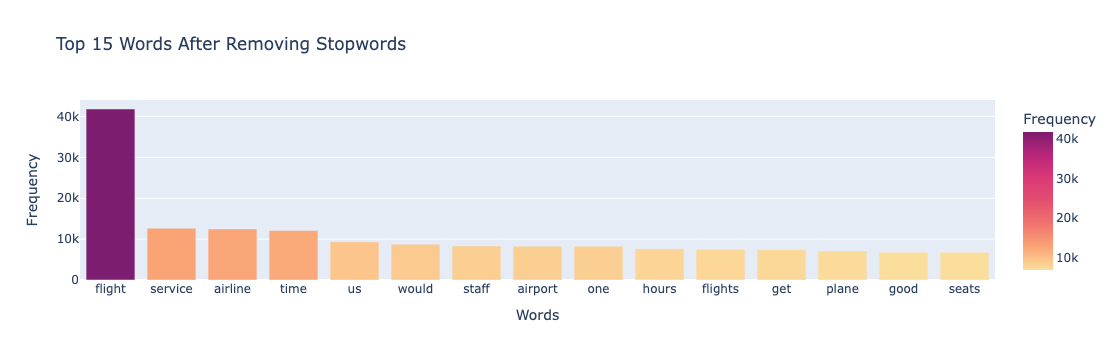

In [113]:
no_stopwords = [word for tokens in df['tokens_no_stopwords'] for word in tokens]

word_freq = Counter(no_stopwords)

top_words = word_freq.most_common(15)

top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

fig = px.bar(top_words_df, 
             x='Word', 
             y='Frequency', 
             title="Top 15 Words After Removing Stopwords", 
             labels={'Word': 'Words', 'Frequency': 'Frequency'}, 
             color='Frequency', 
             color_continuous_scale='sunsetdark')

fig.show()

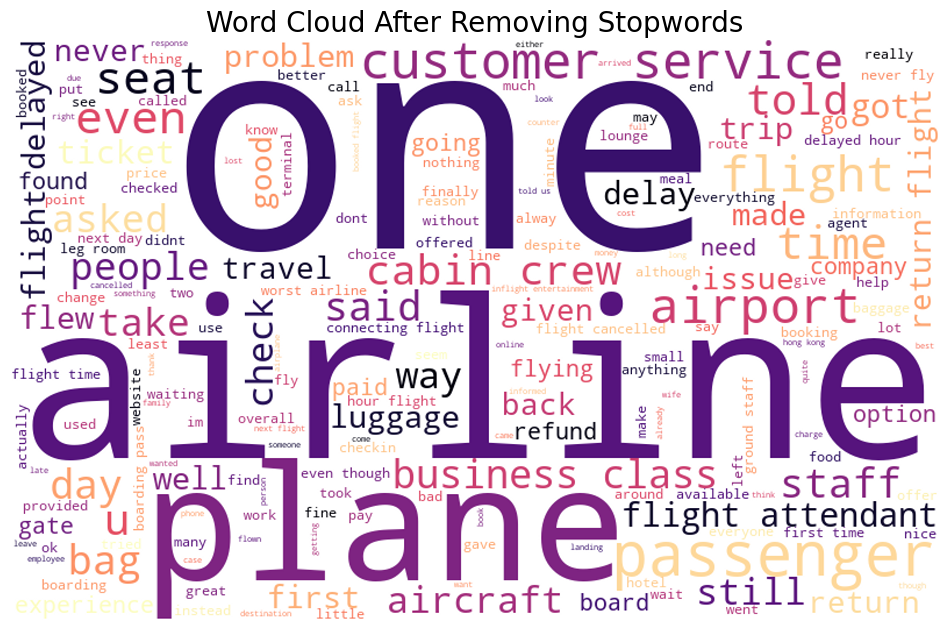

In [125]:
no_stopwords = [word for tokens in df['tokens_no_stopwords'] for word in tokens]

text_for_wordcloud = ' '.join(no_stopwords)
wordcloud = WordCloud(width=800, height=500, background_color='white', colormap='magma').generate(text_for_wordcloud)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='spline16')
plt.axis('off')
plt.title("Word Cloud After Removing Stopwords",fontsize = 20)
plt.show()

In [127]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

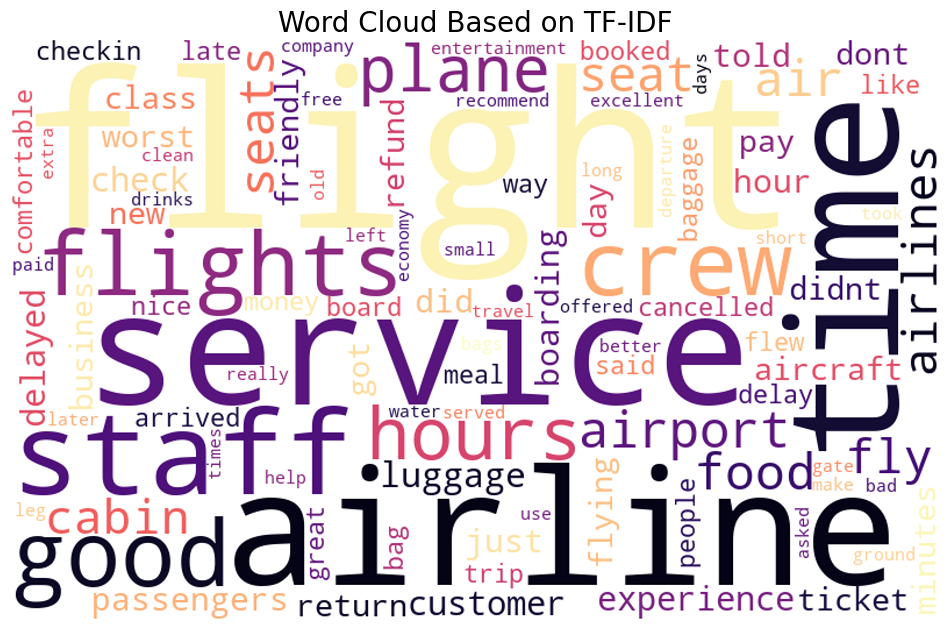

In [131]:
corpus = df['clean_text'].tolist()
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

X_tfidf = vectorizer.fit_transform(corpus)

terms = vectorizer.get_feature_names_out()
tfidf_scores = np.asarray(X_tfidf.sum(axis=0)).flatten()
tfidf_dict = dict(zip(terms, tfidf_scores))
sorted_tfidf = dict(sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True))

top_tfidf_words = {word: score for word, score in list(sorted_tfidf.items())[:100]}

wordcloud = WordCloud(width=800, height=500, background_color='white',colormap='magma').generate_from_frequencies(top_tfidf_words)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='spline16')
plt.axis('off')
plt.title("Word Cloud Based on TF-IDF",fontsize = 20)
plt.show()

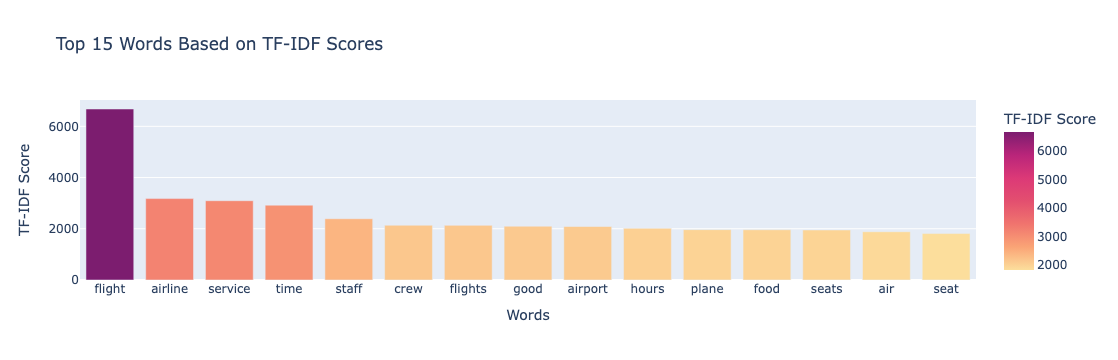

In [135]:
corpus = df['clean_text'].tolist()

vectorizer = TfidfVectorizer(stop_words='english', max_features=20)

X_tfidf = vectorizer.fit_transform(corpus)

terms = vectorizer.get_feature_names_out()

tfidf_scores = np.asarray(X_tfidf.sum(axis=0)).flatten()

tfidf_dict = dict(zip(terms, tfidf_scores))

sorted_tfidf = dict(sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True))

top_n = 15
top_tfidf_words = {word: score for word, score in list(sorted_tfidf.items())[:top_n]}
top_words_df = pd.DataFrame(list(top_tfidf_words.items()), columns=['Word', 'TF-IDF Score'])

fig = px.bar(top_words_df, x='Word', y='TF-IDF Score', title='Top 15 Words Based on TF-IDF Scores',labels={'Word': 'Words', 'TF-IDF Score': 'TF-IDF Score'},color='TF-IDF Score', color_continuous_scale='sunsetdark')
fig.show()

In [139]:
corpus = df['clean_text'].tolist()

vectorizer_bigram = TfidfVectorizer(stop_words='english', ngram_range=(2, 2), max_features=20)  
vectorizer_trigram = TfidfVectorizer(stop_words='english', ngram_range=(3, 3), max_features=20) 
X_tfidf_bigram = vectorizer_bigram.fit_transform(corpus)

X_tfidf_trigram = vectorizer_trigram.fit_transform(corpus)

bigram_terms = vectorizer_bigram.get_feature_names_out()
trigram_terms = vectorizer_trigram.get_feature_names_out()

bigram_scores = np.asarray(X_tfidf_bigram.sum(axis=0)).flatten()
trigram_scores = np.asarray(X_tfidf_trigram.sum(axis=0)).flatten()

bigram_dict = dict(zip(bigram_terms, bigram_scores))
trigram_dict = dict(zip(trigram_terms, trigram_scores))

sorted_bigram = dict(sorted(bigram_dict.items(), key=lambda item: item[1], reverse=True))
sorted_trigram = dict(sorted(trigram_dict.items(), key=lambda item: item[1], reverse=True))

top_n = 15
top_bigrams = {bigram: score for bigram, score in list(sorted_bigram.items())[:top_n]}
top_trigrams = {trigram: score for trigram, score in list(sorted_trigram.items())[:top_n]}

top_bigrams_df = pd.DataFrame(list(top_bigrams.items()), columns=['Bigram', 'TF-IDF Score'])
top_trigrams_df = pd.DataFrame(list(top_trigrams.items()), columns=['Trigram', 'TF-IDF Score'])

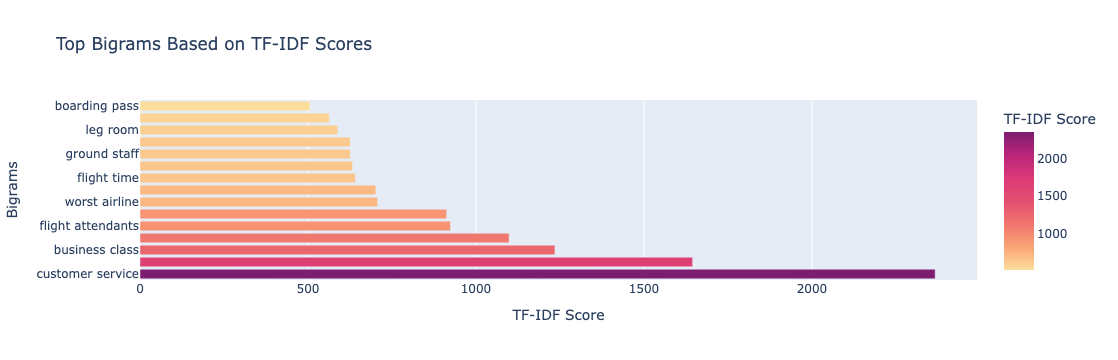

In [147]:
fig_bigram = px.bar(top_bigrams_df, y='Bigram', x='TF-IDF Score',
                    title='Top Bigrams Based on TF-IDF Scores',
                    labels={'Bigram': 'Bigrams', 'TF-IDF Score': 'TF-IDF Score'},
                    color='TF-IDF Score', color_continuous_scale='sunsetdark')
fig_bigram.show()

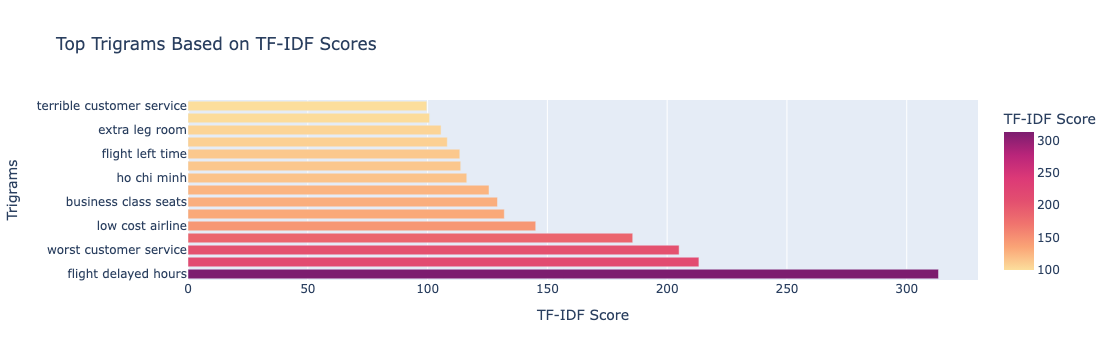

In [145]:
fig_trigram = px.bar(top_trigrams_df, y='Trigram', x='TF-IDF Score',
                     title='Top Trigrams Based on TF-IDF Scores',
                     labels={'Trigram': 'Trigrams', 'TF-IDF Score': 'TF-IDF Score'},
                     color='TF-IDF Score', color_continuous_scale='sunsetdark')
fig_trigram.show()

In [37]:
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 1.9 MB/s eta 0:00:00-:--:--


In [39]:
from textblob import TextBlob

text_data = df['clean_text'].dropna()


def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity_clean'] = text_data.apply(get_polarity)

print(df['polarity_clean'])

0        0.302222
1       -0.077083
2        0.045833
3       -0.193750
4        0.175000
           ...   
23166   -0.030159
23167    0.113636
23168    0.026290
23169    0.179687
23170    0.000000
Name: polarity_clean, Length: 23171, dtype: float64


In [41]:
def label_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment_clean'] = df['polarity_clean'].apply(label_sentiment)

print(df['sentiment_clean'])

0        Positive
1        Negative
2        Positive
3        Negative
4        Positive
           ...   
23166    Negative
23167    Positive
23168    Positive
23169    Positive
23170     Neutral
Name: sentiment_clean, Length: 23171, dtype: object


/var/folders/6f/llw8421x2h73wjjtn9b3rqww0000gn/T/ipykernel_68558/3778154831.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




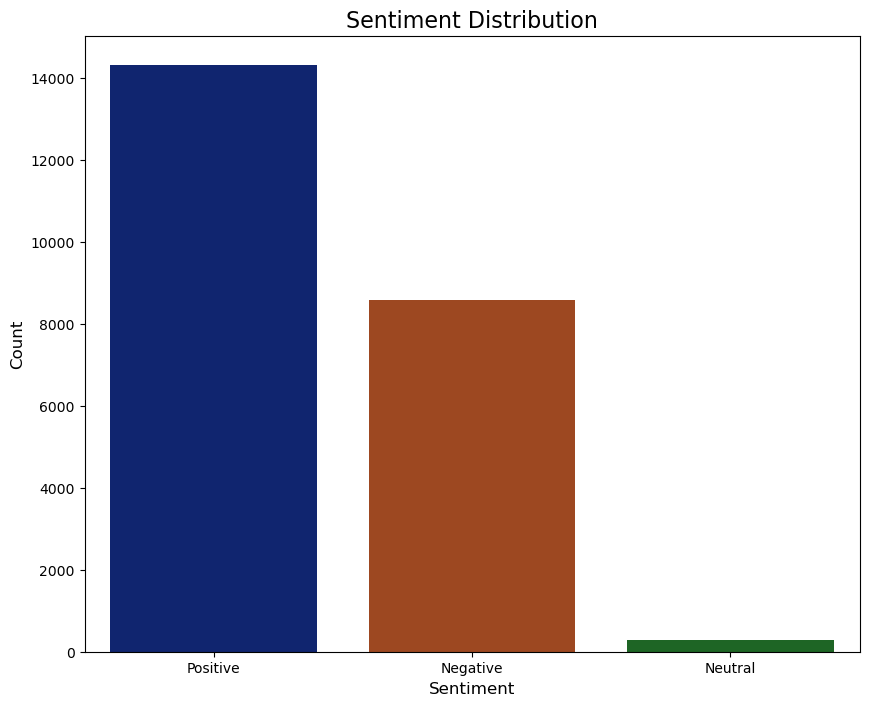

In [71]:
plt.figure(figsize=(10, 8))
sns.countplot(x='sentiment_clean', data=df, palette="dark")
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [73]:
def get_sub(text):
    return TextBlob(text).sentiment.subjectivity

df['subjectivity'] = text_data.apply(get_sub)
print(df['subjectivity'])

0        0.626111
1        0.418333
2        0.536667
3        0.582292
4        0.522917
           ...   
23166    0.353968
23167    0.531818
23168    0.178175
23169    0.494792
23170    0.500000
Name: subjectivity, Length: 23171, dtype: float64


In [49]:
def label_subjectivity(subjectivity):
    if subjectivity < 0.5:
        return 'Subjective'
    elif subjectivity > 0.5:
        return 'Objective'
    else:
        return 'Neutral'

df['subjectivity_label'] = df['subjectivity'].apply(label_subjectivity)

print(df['subjectivity_label'])

0         Objective
1        Subjective
2         Objective
3         Objective
4         Objective
            ...    
23166    Subjective
23167     Objective
23168    Subjective
23169    Subjective
23170       Neutral
Name: subjectivity_label, Length: 23171, dtype: object


/var/folders/6f/llw8421x2h73wjjtn9b3rqww0000gn/T/ipykernel_68558/1252136944.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




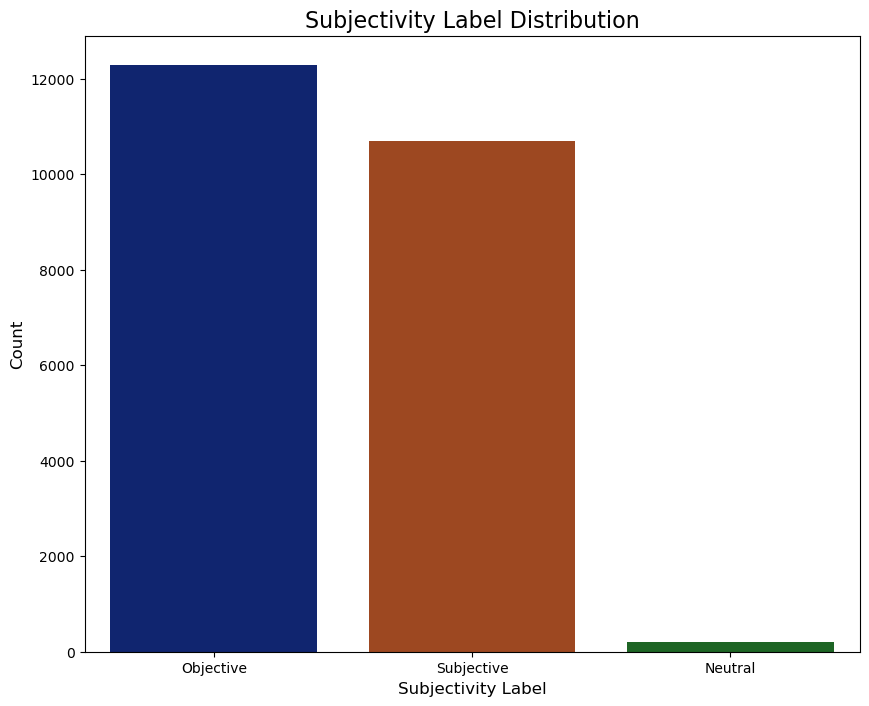

In [75]:
plt.figure(figsize=(10, 8))
sns.countplot(x='subjectivity_label', data=df, palette='dark')
plt.title('Subjectivity Label Distribution', fontsize=16)
plt.xlabel('Subjectivity Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [55]:
!pip install vaderSentiment

  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata (572 bytes)
Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)


In [57]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()

df['vader_score'] = df['clean_text'].apply(lambda cleaned: sent.polarity_scores(cleaned))

print(df['vader_score'])

0        {'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'comp...
1        {'neg': 0.083, 'neu': 0.89, 'pos': 0.028, 'com...
2        {'neg': 0.063, 'neu': 0.86, 'pos': 0.078, 'com...
3        {'neg': 0.191, 'neu': 0.772, 'pos': 0.037, 'co...
4        {'neg': 0.074, 'neu': 0.855, 'pos': 0.072, 'co...
                               ...                        
23166    {'neg': 0.148, 'neu': 0.843, 'pos': 0.009, 'co...
23167    {'neg': 0.067, 'neu': 0.886, 'pos': 0.047, 'co...
23168    {'neg': 0.04, 'neu': 0.96, 'pos': 0.0, 'compou...
23169    {'neg': 0.052, 'neu': 0.854, 'pos': 0.094, 'co...
23170    {'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...
Name: vader_score, Length: 23171, dtype: object


In [59]:
df['vader_Comp'] = df['vader_score'].apply(lambda score_dict: score_dict['compound'])

print(df['vader_Comp'])

0        0.9192
1       -0.7869
2        0.2642
3       -0.9583
4       -0.0675
          ...  
23166   -0.9690
23167   -0.5913
23168   -0.6917
23169    0.9757
23170   -0.9025
Name: vader_Comp, Length: 23171, dtype: float64


/var/folders/6f/llw8421x2h73wjjtn9b3rqww0000gn/T/ipykernel_68558/2295905729.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




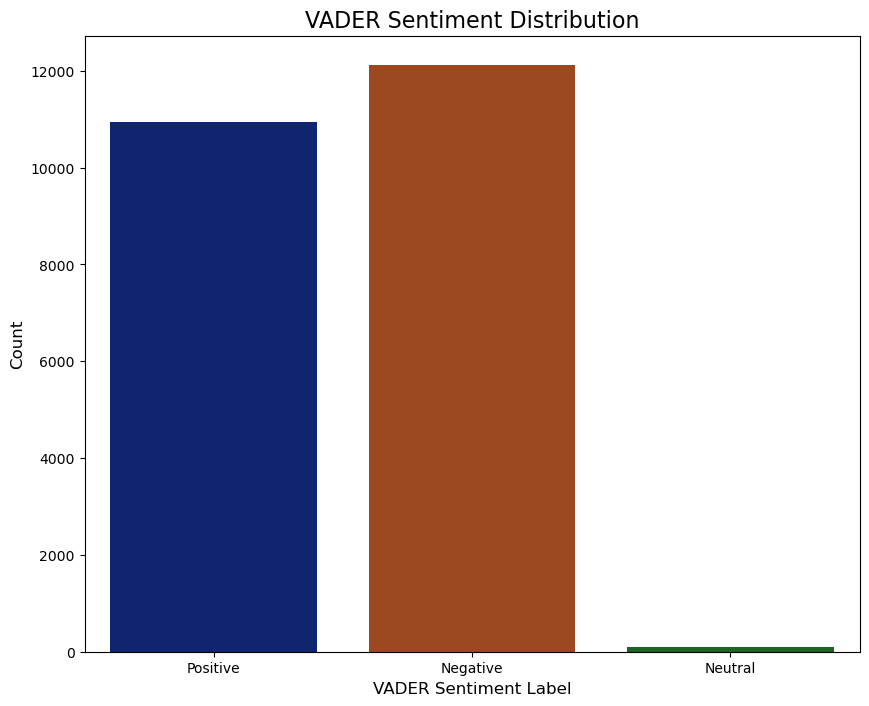

In [77]:
def label_vader(vader_score):
    if vader_score == 0:
        return 'Neutral'
    elif vader_score > 0:
        return 'Positive'
    else:
        return 'Negative'

df['vader_label'] = df['vader_Comp'].apply(label_vader)

plt.figure(figsize=(10, 8))
sns.countplot(x='vader_label', data=df, palette='dark')
plt.title('VADER Sentiment Distribution', fontsize=16)
plt.xlabel('VADER Sentiment Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

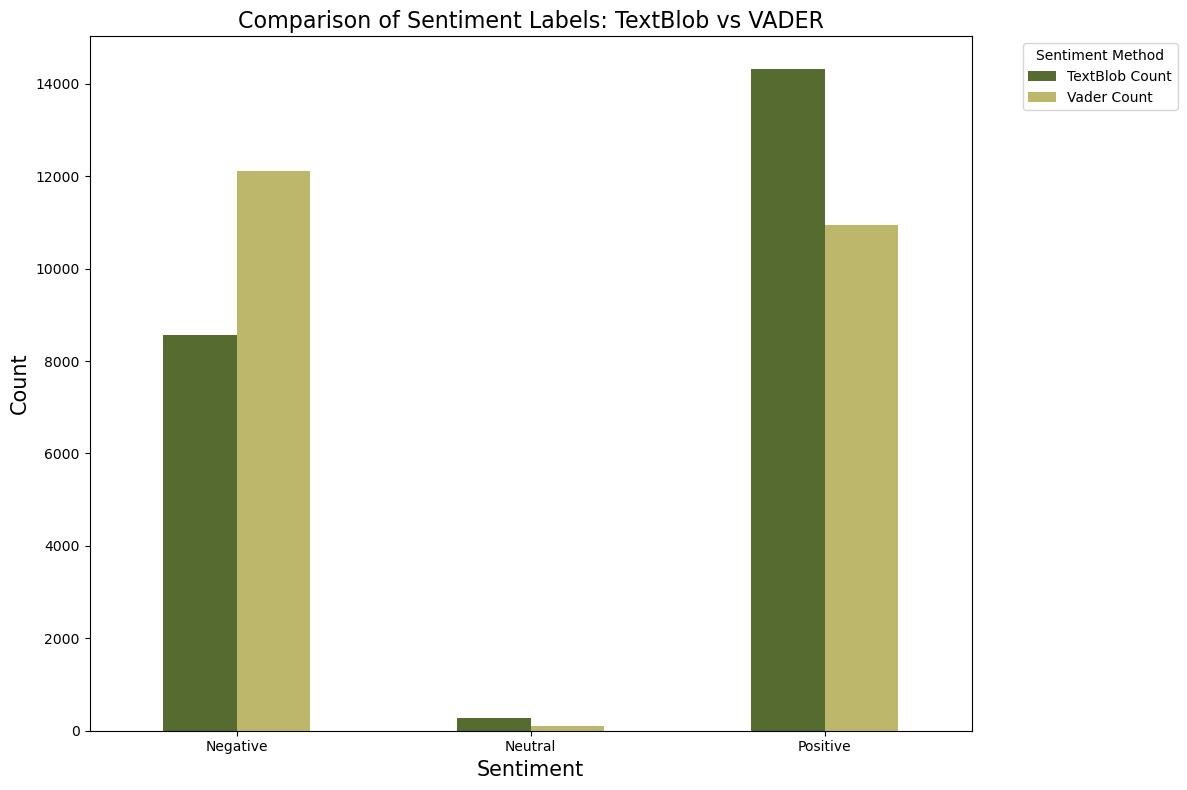

In [99]:
textblob_counts = df['sentiment_clean'].value_counts().reset_index()
textblob_counts.columns = ['Sentiment', 'TextBlob Count']

vader_counts = df['vader_label'].value_counts().reset_index()
vader_counts.columns = ['Sentiment', 'Vader Count']

comparison_df = pd.merge(textblob_counts, vader_counts, on='Sentiment', how='outer')
comparison_df.set_index('Sentiment', inplace=True)

ax = comparison_df.plot(kind='bar', figsize=(12, 8), color=['darkolivegreen', 'darkkhaki'])

plt.title('Comparison of Sentiment Labels: TextBlob vs VADER', fontsize=16)
plt.xlabel('Sentiment', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=0)
plt.legend(title='Sentiment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()